# Value Iteration for the 2d Grid env

# Importing the libraries

In [36]:
from env import Grid_World
import numpy as np 
import matplotlib.pyplot as plt

# Creating the environment 

In [37]:
Env_Size = 4
env = Grid_World(size= Env_Size, type= "fixed", render_mode="rgb_array")

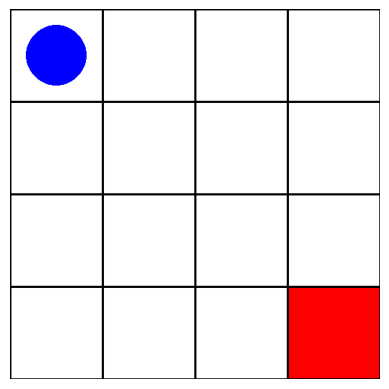

In [38]:
state, target = env.reset()
frame = env.render()
plt.axis('off')
plt.imshow(frame)

# Defining the policy

In [39]:
policy_probablities = np.full((Env_Size, Env_Size, 4), 0.25)
print(policy_probablities)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


In [40]:
def policy(state):
    policy_probs = policy_probablities[state]
    return np.random.choice(4,p = policy_probs)

### Testing the policy with state 0

In [41]:
action = policy((0,0))
print(action)

2


# Defining the value table 

In [42]:
state_values = np.zeros((Env_Size, Env_Size))

In [43]:
print(state_values)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [44]:
def value_iteration(policy_probablities, state_values, theta = 1e-6, gamma = 0.99):
    delta = float("inf")

    while delta > theta: 
        delta = 0
        for row in range(Env_Size):
            for col in range(Env_Size):
                old_value = state_values[row,col]
                action_probs = None
                max_qsa = float("-inf")

                for action in range(4):
                    (next_row, next_col), reward, _, _ = env.simulate_step((row,col), action)
                    qsa = reward + gamma * state_values[(next_row, next_col)]

                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1

                state_values[(row,col)] = max_qsa
                policy_probablities[(row,col)] = action_probs
                delta = max(delta, abs(max_qsa - old_value))


                

In [45]:
value_iteration(policy_probablities, state_values)

In [46]:
print(state_values)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [47]:
print(policy_probablities)

[[[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]]


In [48]:
def test_agent(policy, episodes = 1, epsilon = 0):
    env.render_mode = Render_mode
    if env.render_mode == "human":
        env.py_init()
    
    for episode in range(0,episodes):
        state, _= env.reset()
        done = False
        while not done: 
            action = policy(state,epsilon)
            state, _, done, _ = env.step(action)
            frame = env.render()
            if env.render_mode == "rgb_array":
                plt.imshow(frame)
                plt.axis = ('off')
                display.display(plt.gcf())
                display.clear_output(wait = True)
    if env.render_mode == "human":
        env.close()



In [49]:
test_agent(env, policy)

NameError: name 'Render_mode' is not defined